# Eigenstates for 2x2x4 lattices.
Check the basis lattices and their influence for 2x2x4 lattices. Data is stored in `../python_data/eigenstates_analysis/`.

All these checks are done for bosons.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../python_gauss_lattice/')
from gauss_lattice import HamiltonianBuilder
from gauss_lattice.aux_stuff import size_tag, winding_tag


data_dir = '../python_data/eigenstates_analysis/'

Avaliable data for 2x2x4.

In [2]:
lambdas = [-10, -5]

## Lower part of the spectrum.

-320.589299410000
-320.589136280000
-320.588510840000
-320.588510840000
-320.588510840000
-320.588510840000
-320.588172090000
-320.587885580000
-320.586681960000
-320.586681940000
-320.586518800000
-320.586395400000


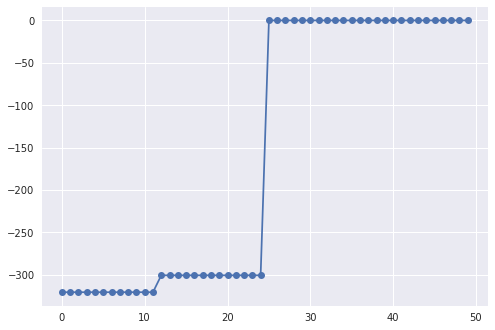

In [3]:
param = {
    'L' : [2,2,4],
    'lambda' : -10,
    'gauge_particles' : 'bosons',
    'ws' : [0,0,0]
}
tag = '_' + param['gauge_particles'] + '_' + winding_tag(param['ws'], shift=param['L']) + '_' + size_tag(param['L']) + '_lam{:.2f}.dat'.format(param['lambda'])
eigenvalues = pd.read_csv(data_dir + 'spectrum'+tag, skiprows=0, names=['E'], index_col=False)
eigenstates = np.load(data_dir+'eigenstates'+tag+'.npy')

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    ax.plot(eigenvalues, marker='o')

for ev in eigenvalues['E'][:12]:
    print('{:.12f}'.format(ev))

### Find the dominant eigen-lattices.

In [3]:
def get_squeezed_eigenstate(full_estate, threshold=1e-2):
    """ Takes in an eigenstate (as a 1D numpy-array) and returns
        the leading contributions, i.e., the ones larger in magnitude
        than the threshold.
        Also returns the appropriate indicies.
    """
    ses = full_estate[np.abs(full_estate) >= threshold].flatten()
    i = np.argwhere(np.abs(full_estate) >= threshold)
    return ses, i

In [6]:
n_states = 15
sorted_es = np.zeros(shape=(eigenstates.shape[0],n_states))
for i in range(n_states):
    sorted_es[:,i] = sorted(np.abs(eigenstates[:,i]))

NameError: name 'n_states' is not defined

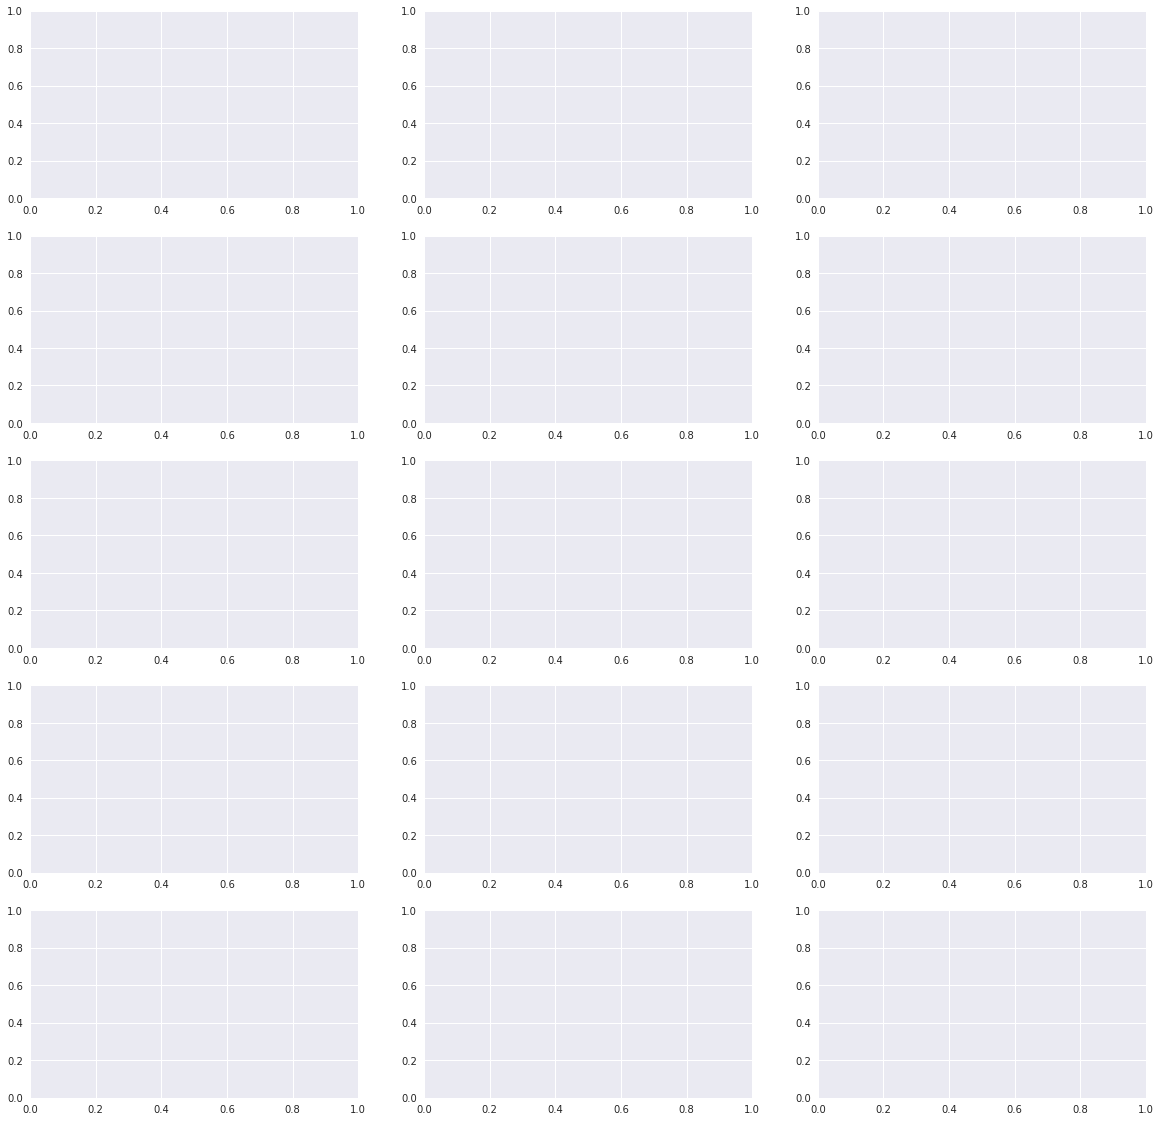

In [7]:
thresholds = {
    -5: 5e-2,
    -10 : 2e-2,
    -100 : 2e-3
}

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(5,3)
    fig.set_size_inches(20, 20)
    ax = ax.flatten()
    
    for i in range(n_states):
        ses = get_squeezed_eigenstate(eigenstates[:,i], threshold=thresholds[param['lambda']])
        print('{:d} states, |c|^2 = {:.12f}'.format(len(ses[0]), np.dot(ses[0],ses[0])))
#         ax[i].plot(eigenstates[:,estate], ls='', marker='.', color='gray', alpha=12)
#         ax[i].plot(ses[1], ses[0], ls='', marker='o')
        ax[i].plot(sorted_es[-100:,i][::-1])
    
        ax[i].axhline(thresholds[param['lambda']], ls=':', color='red', lw=0.5)
        
#         ax[i].axhline(np.sqrt(1/12), ls='--', color='gray', marker='')
#         ax[i].axhline(-np.sqrt(1/12), ls='--', color='gray', marker='')
        
        # The lattices are organized such, that the reversing the order corresponds
        # to a charge conjugation, i.e., occupied links become unoccupied and vice versa.
        # (in the spin picture: all directions are flipped).
        # We can use this to check the parity under this transformation.
        
#         atol = 1e-5
#         if np.allclose(ses[0][::-1], ses[0], atol=atol):
#             ax[i].set_facecolor((1.0, 0.47, 0.42, 0.2))
#         elif np.allclose(ses[0][::-1], -ses[0], atol=atol):
#             ax[i].set_facecolor((1.0, 0.87, 0.42, 0.2))
            
#         ext = 0.6
#         ax[i].set_ylim(-ext, ext)

        ax[i].set_yscale('log')
        ax[i].axvline(12, ls='--', color='gray')
    
#     ax[0,0].set_yscale('log')
#     ax[0,1].set_yscale('log')

# print(np.argwhere(np.abs(eigenstates[:,estate]) >= threshold).T)
# contributions = np.array(builder.lookup_table)[np.argwhere(np.abs(eigenstates[:,estate]) >= threshold).flatten()]
# print(contributions)

# fig.tight_layout()
# fig.savefig('parity_states_lambda-100.pdf')

## Basis lattices.

In [5]:
from gauss_lattice.aux_stuff import read_winding_sector

states, ws = read_winding_sector(param['L'], param['ws'], basedir='../python_data/local_state_storage/')
builder = HamiltonianBuilder(param, states=np.array(states))

contributions_1 = np.array(builder.lookup_table)[np.argwhere(np.abs(eigenstates[:,0]) >= 0.01).flatten()]
contributions_2 = np.array(builder.lookup_table)[np.argwhere(np.abs(eigenstates[:,8]) >= 0.01).flatten()]

Supplied winding numbers [0, 0, 0] are mapped to (4, 4, 2)
[16:38:09] Setting up the Hamiltonian with 1552024 Fock states.


In [6]:
list(contributions_1) + list(contributions_2)

[64030919769180,
 64963162609002,
 90962379586260,
 95261054903217,
 126550380058830,
 129916812535965,
 151558164174690,
 154924596651825,
 186213921807438,
 190512597124395,
 216511814101653,
 217444056941475,
 64963162609002,
 95261054903217,
 186213921807438,
 216511814101653]

Setting up lattice 64030919769180
# of flippable plaquettes: 32
Setting up lattice 64963162609002
# of flippable plaquettes: 32
Setting up lattice 64963162609002
# of flippable plaquettes: 32
Setting up lattice 90962379586260
# of flippable plaquettes: 32
Setting up lattice 95261054903217
# of flippable plaquettes: 32
Setting up lattice 95261054903217
# of flippable plaquettes: 32
Setting up lattice 126550380058830
# of flippable plaquettes: 32
Setting up lattice 129916812535965
# of flippable plaquettes: 32
Setting up lattice 151558164174690
# of flippable plaquettes: 32
Setting up lattice 154924596651825
# of flippable plaquettes: 32
Setting up lattice 186213921807438
# of flippable plaquettes: 32
Setting up lattice 186213921807438
# of flippable plaquettes: 32
Setting up lattice 190512597124395
# of flippable plaquettes: 32
Setting up lattice 216511814101653
# of flippable plaquettes: 32
Setting up lattice 216511814101653
# of flippable plaquettes: 32
Setting up lattice 217444056941

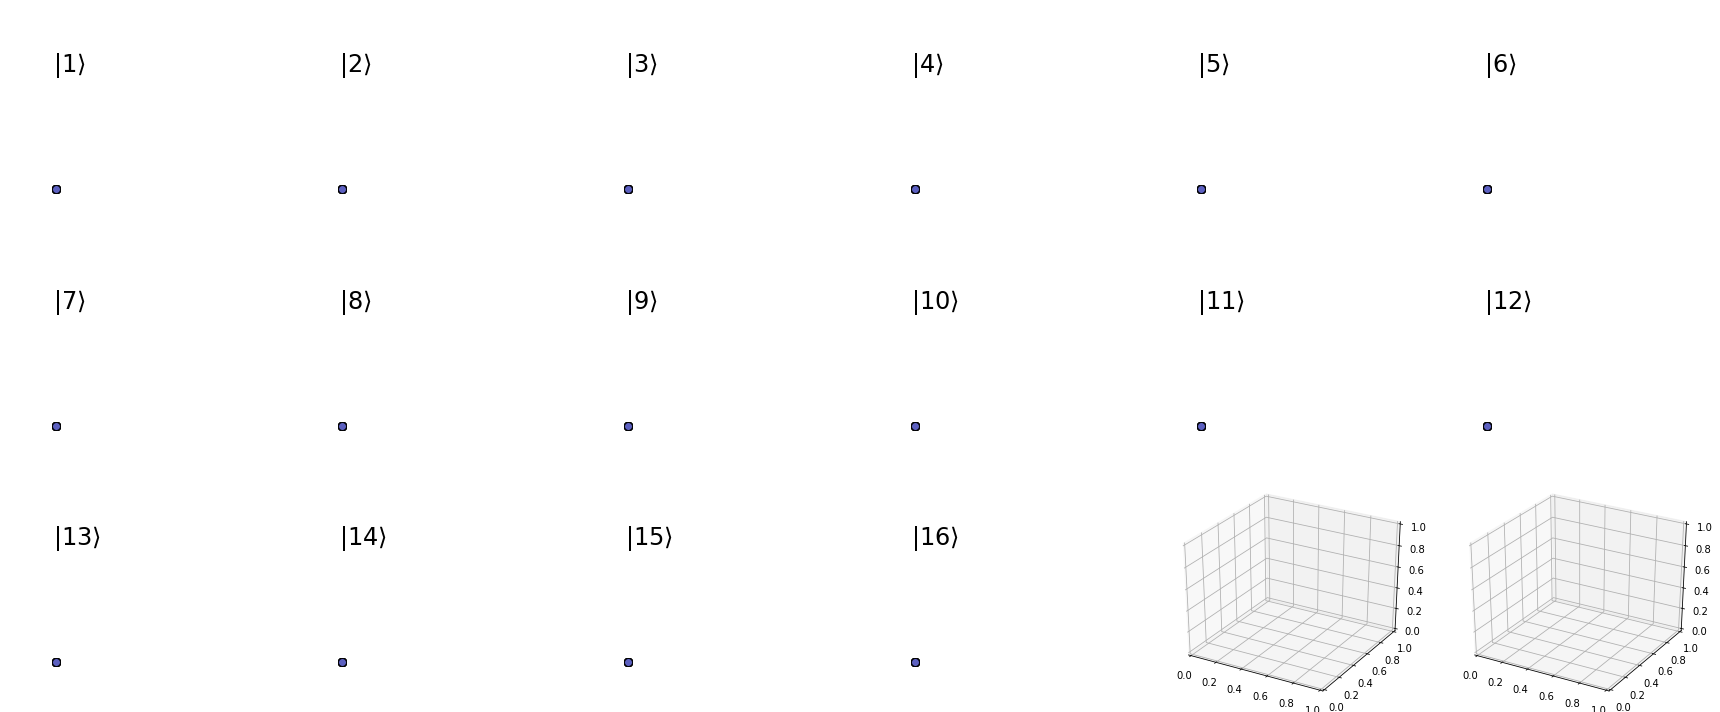

In [7]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../symmetry_stuff/')
from lattice_object import LatticeObject

def draw_collection(states, filename=None, figsize=(24,10)):
    n_cols = 6
    n_rows = len(states)//n_cols + (1 if len(states)%n_cols else 0)
    fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'})
    fig.set_size_inches(*figsize)
    axes = axes.flatten()

    for i, c in enumerate(states):
        latt = LatticeObject(c, [2,2,4])
        latt.draw(c, axis=axes[i], label='$|{:d}\\rangle$'.format(i+1))

    fig.tight_layout()
    if filename is not None:
        fig.savefig(filename)
        
draw_collection(sorted(list(contributions_1) + list(contributions_2)))

## Rotation tests.

Setting up lattice 216511814101653
# of flippable plaquettes: 32
# of flippable plaquettes: 16


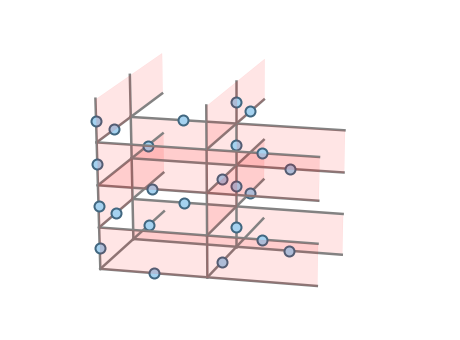

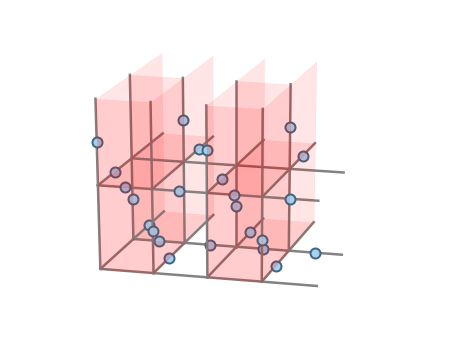

In [13]:
# latt = LatticeObject(1+2+4, [2,2,4])
ind = [0, 12, 24, 36, 6]
# latt = LatticeObject(sum([2**k for k in ind]), [2,2,4])
latt = LatticeObject(216511814101653, [2,2,4])
latt.draw()
latt.apply_c3(axis=1, steps=2)
# latt.apply_translation(0, extent=1)
# latt.apply_translation(1, extent=1)
# latt.apply_translation(2, extent=1)
latt.draw()